# Selecting Best Features from Bank Marketing Data Set using EDA 
(Exploratory Data Analysis)

## Bank Marketing Data Set 

Data from https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Abstract: 

The data is from direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The goal is to identify features by importantance ( Feature Selection) and their relationship to the target variable; which is if the client will subscribe a term deposit (variable y).

### Feature Selection & Exploratory Data Analysis (EDA) 

When we are using features to predict a target, some of the features will be important than others. 
E.g if we are predicting whether someone will default on loan, their credit score will be much better predicter of default than their height or gender. 

We often determine the important features in relation to our target variable after fitting data in a ML algorithm like Logistic regression or Multiple linear regression, but effort here is to show feature selection methods like

- Variance thresholding:
Remove features with too little or too much variation

- Univariate statistical selection:
Use statistical test between features and the target to measure relationship strength.

are important in building intution that makes Exploratory Data Analysis (EDA) more affective in drawing insights so valuable for marketing campaigns and business from data 

### Citations

- UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bank+marketing)
- Hands on Data Analysis with Pandas 2nd Edition - Stef Molin



## Part 1 : Univariate Feature Selection Using Multiple Correlation Methods

- Pearson Correlation
- Phik
- Mutual Information Score & Chi-Squared
- Anova

## Part 2: EDA 

- Conversion By Campaign
- Conversion By Age
- Conversion vs Non-Conversion
  - By Education
  - Last Contact Duration
- Conversion By Age Group & Marital Status




## Part 1
#### Setup & Univariate stats feature selection

In [1]:
import pandas as pd 
from time import strptime
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Importing Data From CSV

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

#### DataFrame has 45211 Rows and 17 Columns

In [3]:
df.shape

(45211, 17)

#### Quick preview of first 5 Rows

In [4]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25462,55,blue-collar,divorced,secondary,no,4053,no,no,cellular,19,nov,113,1,166,2,failure,no
22000,36,technician,married,secondary,no,196,yes,no,cellular,20,aug,687,2,-1,0,unknown,no
40370,64,retired,married,secondary,no,5966,yes,no,cellular,22,jun,983,1,-1,0,unknown,yes
19876,53,unemployed,divorced,tertiary,no,0,yes,yes,cellular,8,aug,140,2,-1,0,unknown,no
36849,36,blue-collar,married,secondary,no,98,yes,no,cellular,12,may,415,1,344,1,failure,no


#### Variance Thresholding - Removing Features with too much and too little variance
Here we are filtering for columns(features) that have too many unique features or very little variance. 

In [5]:
for x in df.columns:
   print(x, len(df[x].unique()))

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


#### We Loop through the features and list those with high number of Unique values
Luckily for us there aren't any so there are no columns to drop here

In [6]:
for col in df.columns:
    fraction_unique = df[col].unique().shape[0] / df.shape[0]
    if fraction_unique > 0.5:
        print(col)

#### Univariate Statistics Feature Selection

One simple way to check how strongly features relate to the target is by using correlation. 
For linear relationships between features and the target we can use Pearson correlation. 
In our case the target ( users who converted or not) is binary as well. If the data does not have have a linear relationship (e.g relationship of y with binary features  like housing and loan) we can use Spearman and Kendall-tau to find the correlation 

#### Make a copy of our DataFrame

In [7]:
df_copy = df.copy()

#### Encode features (columns) with binary data using Sklearn Label encoder 

In [8]:
from sklearn.preprocessing import LabelEncoder 

In [9]:
binary_cols = ['default','housing','loan','y']

df[binary_cols] = df[binary_cols].apply(LabelEncoder().fit_transform)

In [10]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
17324,41,technician,divorced,secondary,0,611,1,0,cellular,28,jul,157,5,-1,0,unknown,0
24674,35,admin.,divorced,secondary,0,0,1,1,cellular,17,nov,86,2,-1,0,unknown,0
13472,53,housemaid,married,primary,0,-286,1,0,cellular,9,jul,126,1,-1,0,unknown,0
19075,40,management,married,secondary,0,1251,1,0,cellular,5,aug,406,1,-1,0,unknown,0
10932,46,blue-collar,married,secondary,0,7,0,0,unknown,17,jun,110,2,-1,0,unknown,0


#### Convert Month Names to Numerical

In [11]:
def convert_months(x):
    return strptime(x, '%b').tm_mon

In [12]:
df['month'] = df.month.apply(convert_months)

In [13]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34262,41,admin.,married,tertiary,0,1536,0,0,cellular,4,5,54,2,-1,0,unknown,0
42627,28,services,single,secondary,0,168,0,0,cellular,12,1,387,1,194,1,other,1
28660,28,management,single,tertiary,0,185,0,0,cellular,30,1,651,2,-1,0,unknown,0
10741,54,technician,married,tertiary,0,417,1,0,unknown,16,6,375,2,-1,0,unknown,0
39280,34,blue-collar,single,primary,0,18,0,0,cellular,18,5,324,4,360,3,other,0


#### Pearson Correlation even in case of Binary Target works well, we use Pandas corr function to bar plot

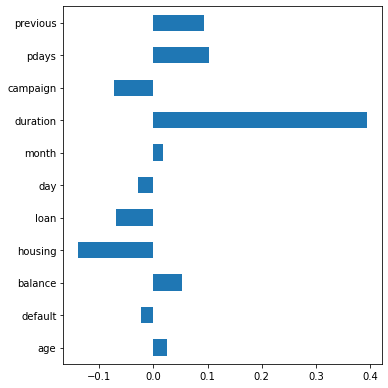

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5.5, 5.5))
df.corr().loc['y'][:-1].plot.barh()
plt.tight_layout()

#### Insights from Numeric and Binary Features:

1. Top 3 positively correlated metrics, duration, pdays, and previous suggest that campaign conversion outcome was significantly affected by frequency of previous contacts in the past. Duration(seconds since last contact) and pdays(days since last contact) suggest that too frequently contacting clients did not result in more conversions in this campaign

2. Housing, and Campaign both show negative correlation to the predicted variable. Housing data represents existing clients who have taken out home loan. Negative correlation on Campaign variable suggest that earlier campaigns were more successful than later campaigns 

#### Lets Look at their p-values for statistical significance from the Pearson correlation:

In [15]:
from scipy.stats import pearsonr
from pandas.api.types import is_numeric_dtype

for col in df.columns[:-1]:
    if is_numeric_dtype(df[col]):
        correlation, pvalue = pearsonr(df[col], df['y'])
        print(f'{col: <40}: {correlation : .4f}, significant: {pvalue <= 0.05}')

age                                     :  0.0252, significant: True
default                                 : -0.0224, significant: True
balance                                 :  0.0528, significant: True
housing                                 : -0.1392, significant: True
loan                                    : -0.0682, significant: True
day                                     : -0.0283, significant: True
month                                   :  0.0187, significant: True
duration                                :  0.3945, significant: True
campaign                                : -0.0732, significant: True
pdays                                   :  0.1036, significant: True
previous                                :  0.0932, significant: True


Our alpha value (significance level) is 0.05, and if the p-value is smaller than this, we can say that our correlation is significantly different from 0 or not worth considering. Luckily for us all the above variables are significant

#### There are many correlation methods, and the choice of one depends on the data type of the feature and the target variable

Spearman & Kendall-tau can be used when data may not have linear relationship. Cramer's V can be used when relationship is categorical-categorical. A more recent phi-k correlation (2018) calculation is a good all round method and can be used for data containing categorical, ordinal and interval features and target. Phik uses chi-squared test at its foundation. 

Lets generate p-value using Phik method

In [16]:
import phik

In [17]:
df_copy1 = df.copy()

#### Convert any Non-interval Column to Category Datatype

In [18]:
interval_columns = ['age', 'balance', 'duration', 'day', 'month', 'pdays']

for c in df.columns:
    if c not in interval_columns:
        df_copy1[c] = df_copy1[c].astype('category')

In [19]:
df_copy1.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month           int64
duration        int64
campaign     category
pdays           int64
previous     category
poutcome     category
y            category
dtype: object

#### Calculate Phik Correlations

In [20]:
phik_correlations = []
phik_significances = []
columns = df_copy1.columns
y = df_copy1['y']

for c in columns:
    x = df_copy1[c]
    if c in interval_columns:
        phik_correlations.append(phik.phik_from_array(x, y, [c]))
        phik_significances.append(phik.significance.significance_from_array(x, y, [c])[0])
    else:
        phik_correlations.append(phik.phik_from_array(x, y))
        # currently need to set the drop over/underflow to false to avoid error. Should be fixed soon in an update
        phik_significances.append(phik.significance.significance_from_array(x, y, drop_overflow=False, drop_underflow=False)[0])


#### Create a DataFrame from correlations and p-values and also Plot them

In [21]:
phik_df = pd.DataFrame({'phik': phik_correlations, 'p-value': phik_significances}, index=columns)
phik_df.sort_values(by='phik', ascending=False, inplace=True)

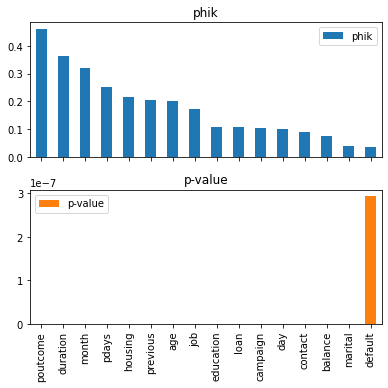

In [22]:
phik_df.iloc[1:].plot.bar(subplots=True, figsize=(5.5, 5.5))
plt.tight_layout()

Top most chart - Phik is plotted with magnitude of Z-score arranged by feature importance. poutcome emerges as features with strongest correlation with the target variable. Most features after Contact show weak correlation, and as p-value shows default can be dropped as the p-value is > 0.5. Lets run default through other Correlation methods to see if it truly can be dropped 

In [23]:
phik_df

,phik,p-value
y,1.000000,0.000000e+00
poutcome,0.461591,0.000000e+00
duration,0.363783,0.000000e+00
month,0.321666,0.000000e+00
pdays,0.250786,2.299945e-271
housing,0.216652,1.463642e-191
previous,0.205353,3.029442e-219
age,0.202715,8.592754e-170
job,0.174158,4.673794e-153
education,0.109065,1.221006e-50


### Mutual Information Score & Chi-squared
Phik is great as general correlation measurement, but we can also use other methods to complement Phik. Mutual information score can be used to measure relationship between two variables on any type, but Scckit-learn package only allow for certain comparisons 

We'll perform:

Categorical to categorical with Sklearn.metrics mutual information method

&

Numeric-numeric, numeric-binary, and binary-binary with sklearn.feature_selection.mutual_info_classif

In [24]:
from sklearn.metrics import normalized_mutual_info_score

In [25]:
df.corr(method=normalized_mutual_info_score)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
age,1.000000,0.000542,0.256146,0.014878,0.002460,0.012238,0.022625,0.100419,0.008409,0.069679,0.008539,0.006374
default,0.000542,1.000000,0.009984,0.000047,0.008895,0.000285,0.001974,0.003052,0.000564,0.004010,0.002748,0.001304
balance,0.256146,0.009984,1.000000,0.031949,0.023176,0.209038,0.114302,0.520331,0.103322,0.183798,0.061185,0.023402
housing,0.014878,0.000047,0.031949,1.000000,0.001526,0.007327,0.102511,0.005886,0.001442,0.031205,0.003460,0.018428
loan,0.002460,0.008895,0.023176,0.001526,1.000000,0.001147,0.012499,0.005324,0.000449,0.008689,0.001721,0.006569
day,0.012238,0.000285,0.209038,0.007327,0.001147,1.000000,0.190907,0.076654,0.017109,0.095793,0.009282,0.003280
month,0.022625,0.001974,0.114302,0.102511,0.012499,0.190907,1.000000,0.037367,0.028414,0.128320,0.041355,0.020319
duration,0.100419,0.003052,0.520331,0.005886,0.005324,0.076654,0.037367,1.000000,0.046927,0.146384,0.030366,0.026922
campaign,0.008409,0.000564,0.103322,0.001442,0.000449,0.017109,0.028414,0.046927,1.000000,0.029323,0.012835,0.004322
pdays,0.069679,0.004010,0.183798,0.031205,0.008689,0.095793,0.128320,0.146384,0.029323,1.000000,0.461083,0.035897


The function returns a value between 0 and 1, where 1 is perfect correlation and 0 is not correlation. We again
see that categorical variables like default, loan have weak relationship

In [26]:
from sklearn.feature_selection import mutual_info_classif


In [27]:
numeric_features = df.select_dtypes(include=['number']).copy()
numeric_features.drop('y', axis=1, inplace=True)
list(zip(numeric_features.columns, mutual_info_classif(numeric_features, df['y'])))

[('age', 0.012274179613478431),
 ('default', 0.0),
 ('balance', 0.02086874986258036),
 ('housing', 0.01237426792906593),
 ('loan', 0.001770199743820866),
 ('day', 0.002977293842460371),
 ('month', 0.025633547744058127),
 ('duration', 0.07086487266702113),
 ('campaign', 0.004339798393262484),
 ('pdays', 0.02580096697093759),
 ('previous', 0.012109729030843175)]

it's best to use this method between numeric and binary variables only. Phik showed us that variable 'balance' 
has weak relationship with target, but as we can see balance emerges as one of the strongest correlated features

#### For Categorical to categorical relationships we can use Chi-squared test.

In [28]:
from sklearn.feature_selection import chi2

In [29]:
chi2(df[['default','loan','housing','previous']], df['y'])

(array([  22.31387496,  176.51613693,  388.94971474, 3593.21990645]),
 array([2.31527677e-06, 2.79337524e-40, 1.40128480e-86, 0.00000000e+00]))

Function returns two arrays; the first is chi-squared test values where bigger means stronger, and the second is p-values. For default we do see that relationship with target variable is weak but still significant (p < 0.05)

#### ANOVA

Anova can be used to compliment other methods such as phik test. This is useful in for comparsions of numeric or binary data
to numeric or binary target variable

In [30]:
from sklearn.feature_selection import f_classif
f_classif(df[['default','age','balance','month','duration']], df['y'])

(array([  22.73392322,   28.62523309,  126.57227551,   15.84350558,
        8333.76114833]),
 array([1.86632653e-06, 8.82564369e-08, 2.52111369e-29, 6.89096288e-05,
        0.00000000e+00]))

Higher F-value signfies a stronger relationship between variables. p-value signifcy if the means of the fatures differ 
significantly between the different target groups, which would signify that the features may have some predictive powers.
For eg Duration is statistically signifcant between those who said Yes or No to the term deposit offer. 

#### EDA 

In [32]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12992,28,blue-collar,married,secondary,0,619,0,0,telephone,7,7,327,2,-1,0,unknown,0
15778,57,retired,married,primary,0,4,0,0,cellular,21,7,50,5,-1,0,unknown,0
7269,30,blue-collar,married,primary,0,1127,1,0,unknown,29,5,13,1,-1,0,unknown,0
17759,48,blue-collar,divorced,secondary,0,1893,0,0,telephone,29,7,538,3,-1,0,unknown,0
23149,36,unemployed,married,tertiary,0,154,0,0,cellular,26,8,556,7,-1,0,unknown,1


In [33]:
df.shape

(45211, 17)

In [38]:
print('Total Conversion: %i out of %i' % (df.y.sum(), df.shape[0]))

Total Conversion: 5289 out of 45211


In [43]:
print('Conversion Rate %0.2f%%' % (df.y.sum()/df.shape[0] * 100))

Conversion Rate 11.70%


## Part 2

### 1. Conversion by Campaign

In [51]:
pd.DataFrame(df.groupby('campaign')['y'].sum()).head(10)

,y
campaign,
1,2561
2,1401
3,618
4,317
5,139
6,92
7,47
8,32
9,21


#### Number of Users Contacted by Each Campaign

In [71]:
pd.DataFrame(df.groupby('campaign')['y'].count()).sort_values(by=['y'], ascending = False).head(10)

,y
campaign,
1,17544
2,12505
3,5521
4,3522
5,1764
6,1291
7,735
8,540
9,327


#### Conversion Rate By Campaign

In [56]:
conversion_by_campaign = df.groupby('campaign')['y'].sum()/df.groupby('campaign')['y'].count() *100

In [72]:
pd.DataFrame(conversion_by_campaign).sort_values(by = ['y'],ascending = False).head(12)

,y
campaign,
1,14.597583
2,11.203519
3,11.193624
32,11.111111
4,9.000568
17,8.695652
11,7.960199
5,7.879819
6,7.126259


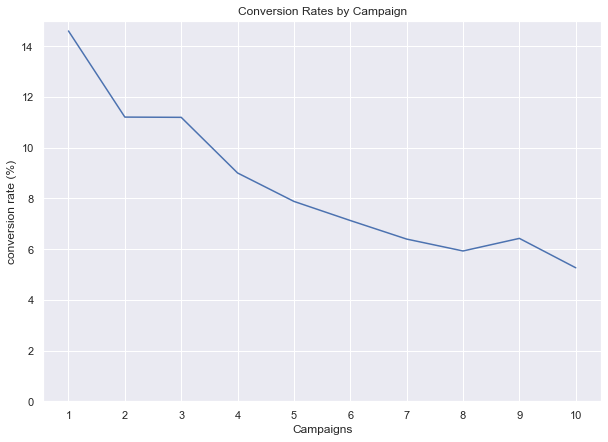

In [113]:
sns.set()
ax = conversion_by_campaign[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversion_by_campaign.index[:10],
    title='Conversion Rates by Campaign'
)

ax.set_ylim([0, 15])
ax.set_xlabel('Campaigns')
ax.set_ylabel('conversion rate (%)')

plt.show()

This confirms the finding from Univariate analysis: Campaign variable was negatively correlated with conversions, and the above chart does confirm that earlier campaigns performed better than later

### 2. Conversion By Age

In [73]:
pd.DataFrame(df.groupby('age')['y'].sum()).sort_values(by = ['y'],ascending = False).head(10)


,y
age,
32,221
30,217
33,210
35,209
31,206
34,198
36,195
29,171
37,170


#### Reach by Age 

In [74]:
pd.DataFrame(df.groupby('age')['y'].count()).sort_values(by = ['y'],ascending = False).head(10)

,y
age,
32,2085
31,1996
33,1972
34,1930
35,1894
36,1806
30,1757
37,1696
39,1487


#### Conversion Rate by Age 

In [76]:
conversions_by_age = df.groupby(
    'age'
)['y'].sum() / df.groupby(
    'age'
)['y'].count() * 100.0



In [78]:
pd.DataFrame(conversions_by_age).head(10)


,y
age,
18,58.333333
19,31.428571
20,30.000000
21,27.848101
22,31.007752
23,21.782178
24,22.516556
25,21.442125
26,16.645963


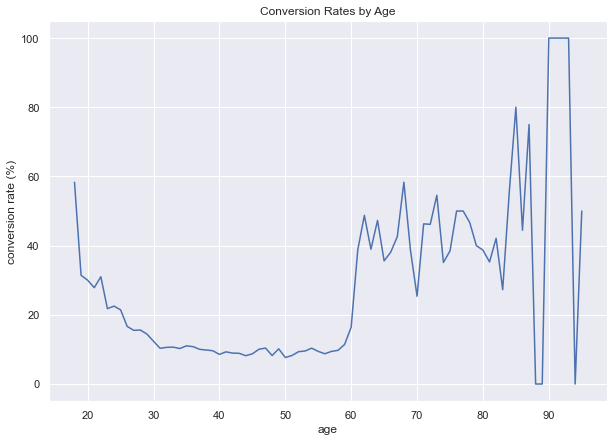

In [88]:
sns.set()
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### By Age Group 

In [80]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [81]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,"[50, 60)"
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,"[40, 50)"
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,"[30, 40)"
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,"[40, 50)"
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,"[30, 40)"


#### Conversions By Age Group

In [82]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['y'].sum()
)


,y
age_group,
70+,235
"[18, 30)",928
"[30, 40)",1913
"[40, 50)",1063
"[50, 60)",785
"[60, 70)",365


#### Conversion Rate by Age Group 

In [83]:
conversions_by_age_group = df.groupby(
    by='age_group'
)['y'].sum() / df.groupby(
    by='age_group'
)['y'].count() * 100.0

In [85]:
pd.DataFrame(conversions_by_age_group).rename({'y':'conversion rate'}, axis = 1)

,conversion rate
age_group,
70+,42.418773
"[18, 30)",17.599090
"[30, 40)",10.575488
"[40, 50)",9.120549
"[50, 60)",9.334126
"[60, 70)",29.674797


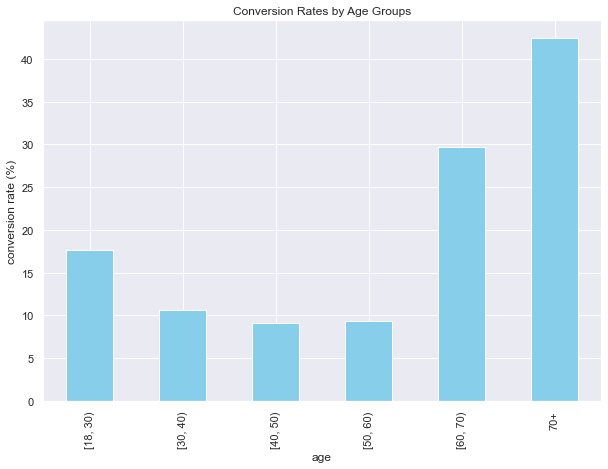

In [87]:
sns.set()
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### 3. Conversions vs. Non-Conversions

#### By Relationship Status

In [94]:
df_copy['conversion'] = df_copy['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [95]:
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [100]:
conversions_by_marital_status_df = pd.pivot_table(df_copy, values='y', index='marital', columns='conversion', aggfunc=len) 
conversions_by_marital_status_df.rename({0: 'non_conversion', 1: 'conversion'}, axis=1, inplace=True)

In [101]:
conversions_by_marital_status_df

conversion,non_conversion,conversion
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


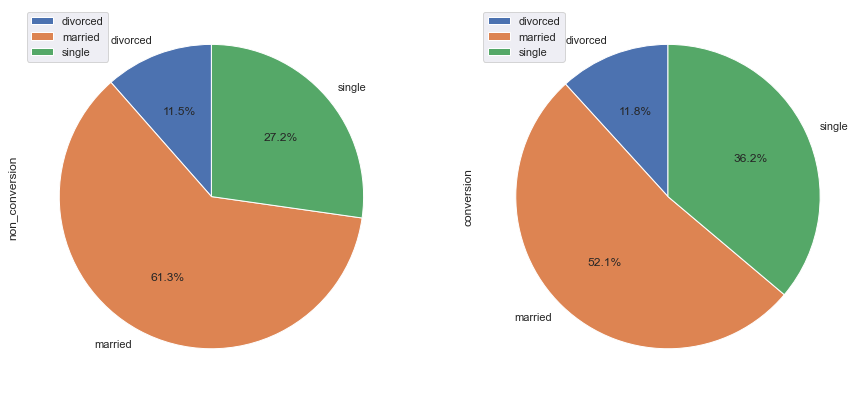

In [102]:
sns.set()

conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()


####  By Education

In [103]:
conversions_by_education_df = pd.pivot_table(df_copy, values='y', index='education', columns='conversion', aggfunc=len) 
conversions_by_education_df.rename({0: 'non_conversion', 1: 'conversion'}, axis=1, inplace=True)

In [104]:
conversions_by_education_df

conversion,non_conversion,conversion
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


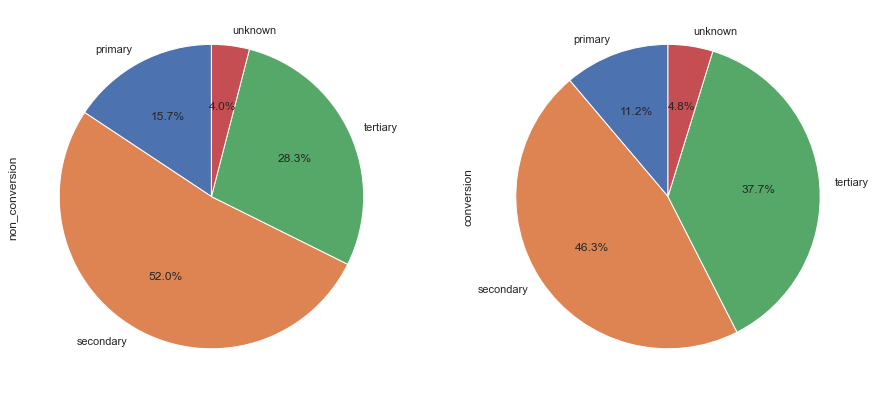

In [105]:
sns.set()
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

#### Last Contact Duration

In [107]:
df.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
1,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


#### Conversion By Age Group & Marital Status

In [108]:
age_marital_df = df.groupby(['age_group', 'marital'])['y'].sum().unstack('marital').fillna(0)

In [109]:
age_marital_df

marital,divorced,married,single
age_group,,,
70+,55,177,3
"[18, 30)",11,123,794
"[30, 40)",158,913,842
"[40, 50)",175,678,210
"[50, 60)",160,572,53
"[60, 70)",63,292,10


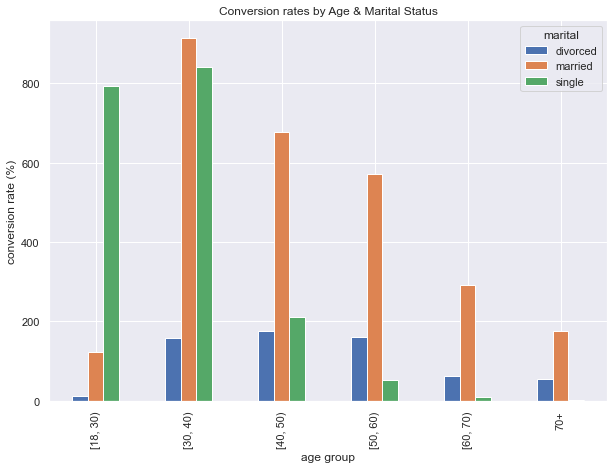

In [110]:
sns.set()
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

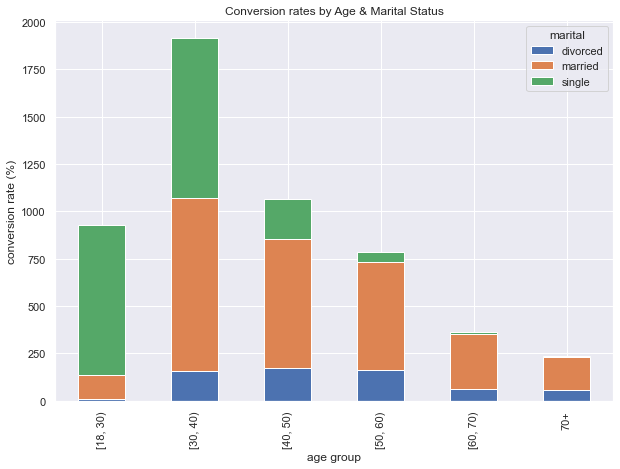

In [111]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()